In [1]:
from recast.CPT_pathlib import CPT
import numpy as np
from pathlib import Path

# Risø campus

In [2]:
layout = CPT()
layout.MESH_EXTENT = 500 # in m
layout.MESH_RES = 5 # in m
layout.AVERAGE_RANGE = 4000 # in m 
layout.PULSE_LENGTH = 200 # in ns
layout.FFT_SIZE = 64 # no points
layout.ACCUMULATION_TIME = 1000 # in ms

layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Users/niva/Desktop/recast-test/'
layout.set_utm_zone('33U')
layout.MAX_ELEVATION_ANGLE = 45

points = np.array([
[317655.989, 6174941.068, 22.3067],
[317655.989, 6174941.068, 32.3067],
[317655.989, 6174941.068, 42.3067],
[317655.989, 6174941.068, 52.3067],
[317655.989, 6174941.068, 62.3067],
[317655.989, 6174941.068, 72.3067],
[317655.989, 6174941.068, 82.3067],
[317655.989, 6174941.068, 92.3067],
[317655.989, 6174941.068, 102.3067],
[317655.989, 6174941.068, 112.3067]
])

layout.add_measurement_instances(points = points, points_type = 'initial')
layout.generate_mesh()

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [3]:
layout.set_path('/Users/niva/Desktop/recast-test///', path_type = 'output')

Path /Users/niva/Desktop/recast-test set for storing CPT outputs


In [4]:
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', path_type = 'landcover')

Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tifset for landcover data


In [5]:
layout.generate_landcover_layer()
layout.generate_topographic_layer()

In [6]:
layout.generate_combined_layer(points_type = 'initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


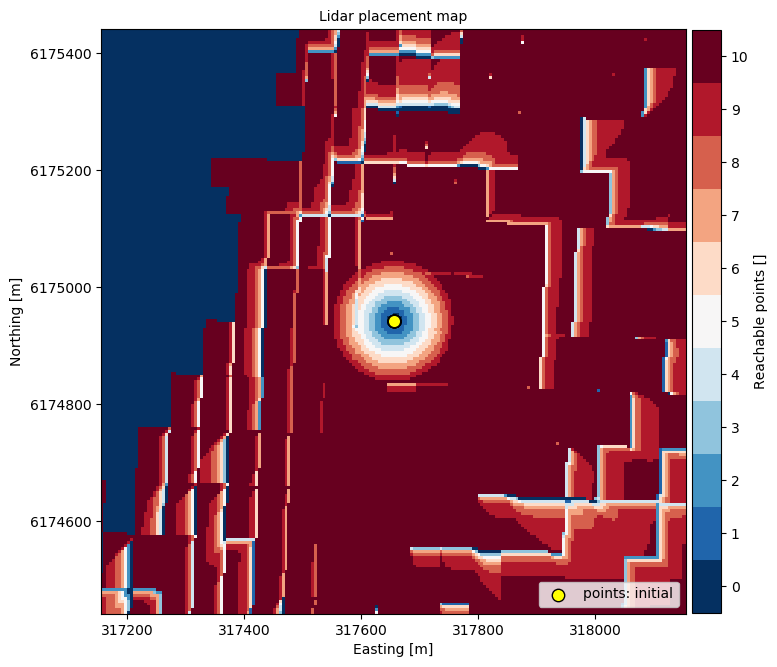

In [7]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [8]:
layout.add_lidar_instance(position = np.array([317531.801180451, 6174900.1704007, 9.903606]),
                          lidar_id = 'brise')

Lidar 'brise' added to the lidar dictionary, which now contains 1 lidar instance(s).


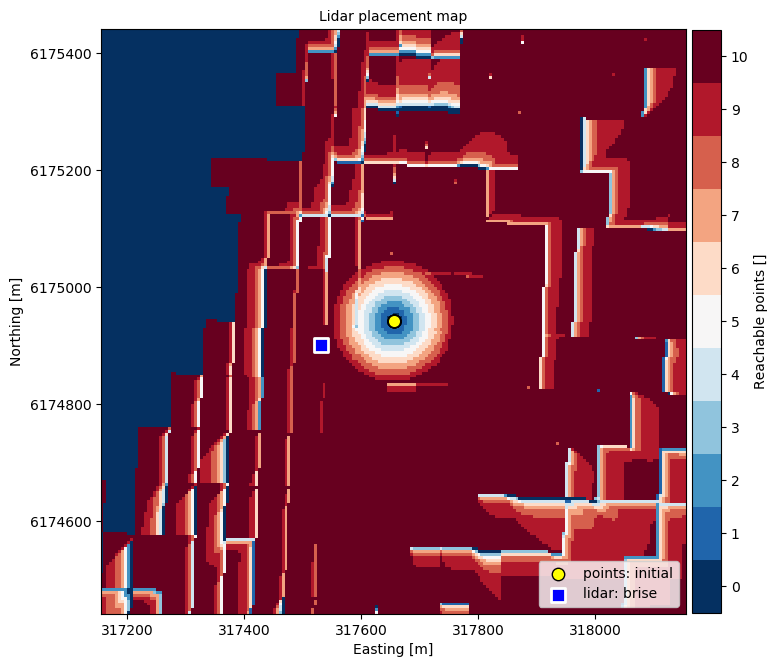

In [9]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [10]:
layout.generate_second_lidar_layer(lidar_id = 'brise')

Updating lidar instance 'brise' considering measurement type 'initial'.


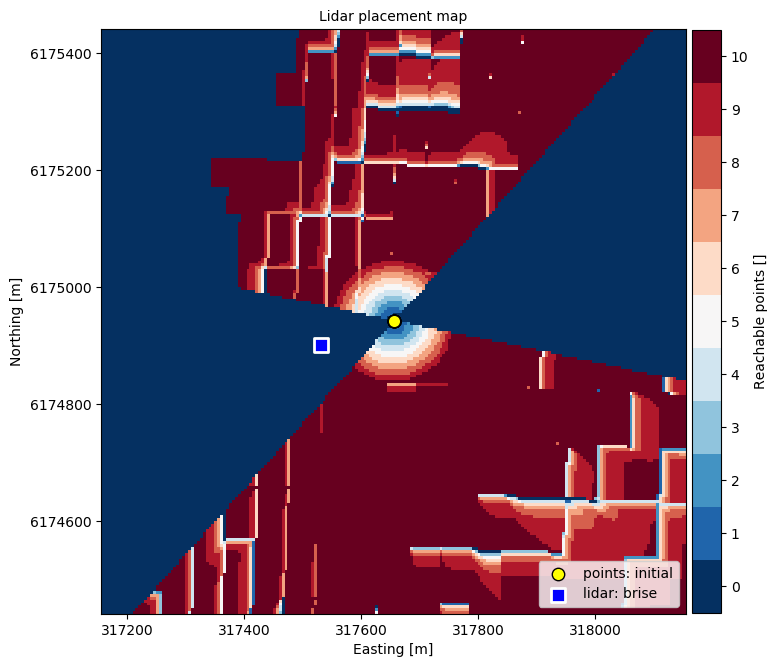

In [11]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [12]:
layout.add_lidar_instance(position = np.array([317574.621049822, 6175024.17501398, 10.942405]), 
                          lidar_id = 'sirocco')

Lidar 'sirocco' added to the lidar dictionary, which now contains 2 lidar instance(s).


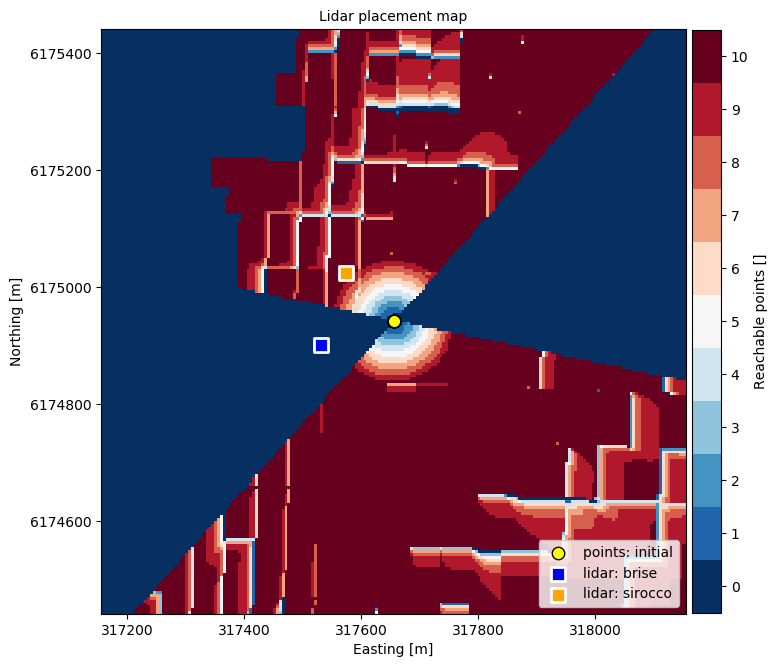

In [13]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [14]:
layout.optimize_trajectory(lidar_ids = ['brise', 'sirocco'], points_type = 'initial', sync = True)

Lidar instances:['brise', 'sirocco'] will be updated with the optimized trajectory
Updating lidar instance 'brise' considering measurement type 'initial'.
Updating lidar instance 'sirocco' considering measurement type 'initial'.
Synchronizing trajectories for lidar instances:['brise', 'sirocco']


In [15]:
layout.export_measurement_scenario(lidar_ids = ['brise', 'sirocco'])